<a href="https://colab.research.google.com/github/FrankQixiangGao/Algorithms-Coursera/blob/main/CS4372.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline 
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler




In [166]:
#Step 1, Loading data in the pandas dataframe object

housing = pd.read_csv("https://raw.githubusercontent.com/FrankQixiangGao/chenduxiu-s-data/main/housing.csv")

In [167]:
#Step 2, checking if there is any missing or null data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [168]:
# Step 2
# Examining data for consistency: Check for null values, missing data, and any data
# inconsistency and handle them before proceeding forward.
pd.isnull(housing).sum()

housing = housing.fillna(method="ffill")
#Check it again, the result show no missing data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [169]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.642151,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.876678,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [170]:
housing.groupby('ocean_proximity').size()
#Convert ocean_proximity from categorial to numeric type
housing["ocean_proximity"] = housing["ocean_proximity"].astype("category").cat.codes
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


longitude


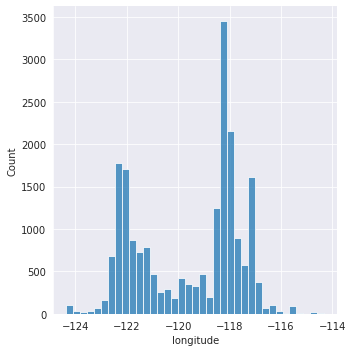

latitude


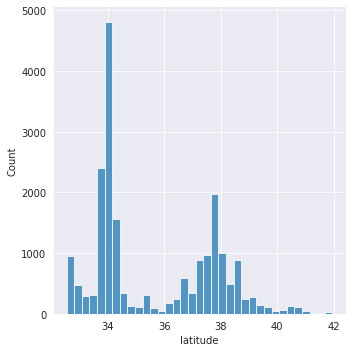

housing_median_age


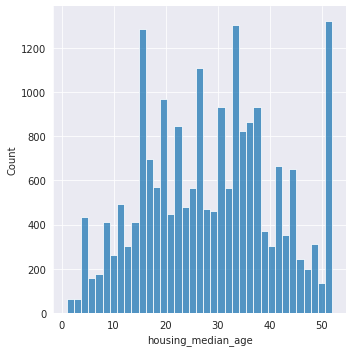

total_rooms


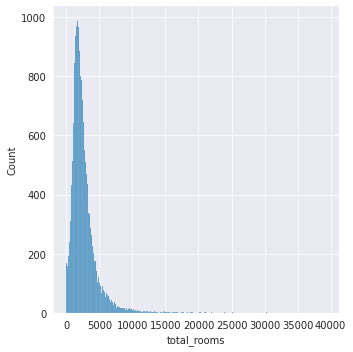

total_bedrooms


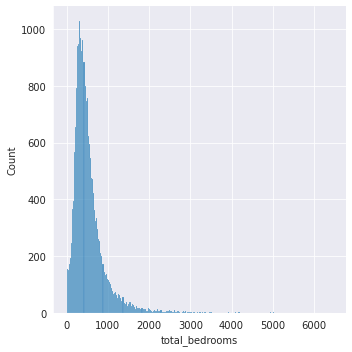

population


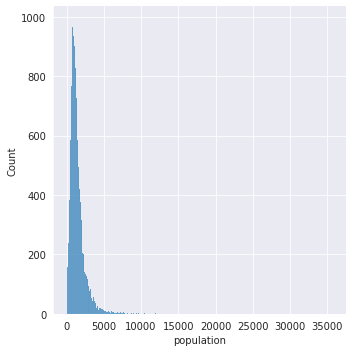

households


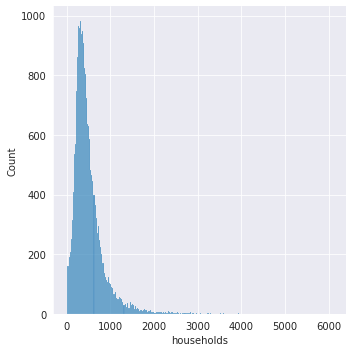

median_income


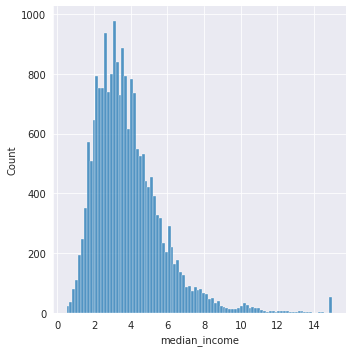

median_house_value


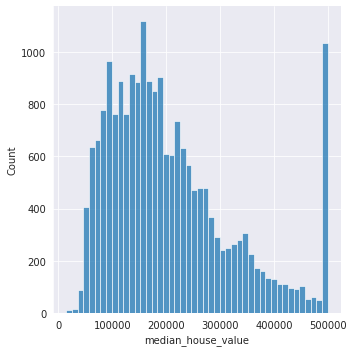

ocean_proximity


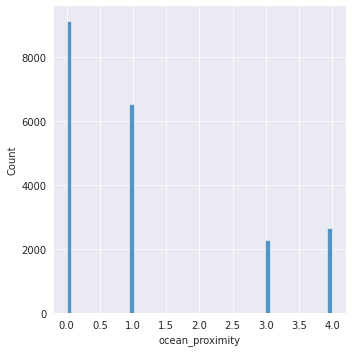

In [171]:
for columns in housing:
  sns.displot(data=housing[columns])
  print(columns)
  plt.show()

For all attribute of california housing princing dataset, longtiude and latidue is not distribution seem it is geography location. Housing_median_age is also not normalized

In [172]:
#Since there are couple of data is not important, let me drop it, and standardize and normalize the rest
housing.pop('latitude')
housing.pop('longitude')
housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [177]:
#normalize and standardize the data
s = StandardScaler()
housing_std = pd.DataFrame(s.fit(housing).fit_transform(housing))
housing_std.head()

,0,1,2,3,4,5,6,7
0,0.982143,-0.804819,-0.970954,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-0.607019,2.045890,1.350447,0.861439,1.669961,2.332238,1.314156,1.291089
2,1.856182,-0.535746,-0.826015,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,1.856182,-0.624215,-0.719093,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,1.856182,-0.462404,-0.612171,-0.759847,-0.629157,-0.012881,1.172900,1.291089


In [179]:
correlation_matrix = housing_std.corr().round(2)
print(correlation_matrix)
#in the following graph, o is housing_median_age, 1 = total_rooms, 2 = total_bedrroms, 3 = population, 4 = households, 5 = median_income, 6 = median_house_value_ 7 = ocean_proximity
# 6 is median_value is the target attribute 
# According to the graph show below, the corr number of housing_median_age with median_house_value is 0.11, total_rooms is 0.13, and median_income is 0.69
# I chose the three attribute for model

      0     1     2     3     4     5     6     7
0  1.00 -0.36 -0.32 -0.30 -0.30 -0.12  0.11  0.11
1 -0.36  1.00  0.93  0.86  0.92  0.20  0.13 -0.02
2 -0.32  0.93  1.00  0.87  0.97 -0.01  0.05 -0.01
3 -0.30  0.86  0.87  1.00  0.91  0.00 -0.02 -0.07
4 -0.30  0.92  0.97  0.91  1.00  0.01  0.07 -0.02
5 -0.12  0.20 -0.01  0.00  0.01  1.00  0.69 -0.01
6  0.11  0.13  0.05 -0.02  0.07  0.69  1.00  0.08
7  0.11 -0.02 -0.01 -0.07 -0.02 -0.01  0.08  1.00


In [182]:
from sklearn.model_selection import train_test_split
X = housing[["housing_median_age", "total_rooms", "median_income"]]
Y = housing['median_house_value']

s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 3)
(4128, 3)
(16512,)
(4128,)


In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
y_train_predict = pd.Series(y_train_predict)

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 80435.51004353301
R2 score is 0.5096383918237419


In [184]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

#-----------for more in-depth diagnostics ----------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
 
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)
 
model = smRegression.fit()
print(model.summary())

ypred = model.predict(X_train_off)
rmse = sm.tools.eval_measures.rmse(Y_train, ypred)

print(rmse)

The model performance for testing set
--------------------------------------
RMSE is 80617.74969655238
R2 score is 0.5289340629925434


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     5719.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        03:40:43   Log-Likelihood:            -2.0994e+05
No. Observations:               16512   AIC:                         4.199e+05
Df Residuals:                   16508   BIC:                         4.199e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.066e+05    626.048    330.023      0.0